In [9]:
from __future__ import print_function
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from scipy.io import loadmat

In [13]:
    
mat = scipy.io.loadmat('ex6data1.mat')
X = mat["X"]
y = mat["y"]
y.shape

(51, 1)

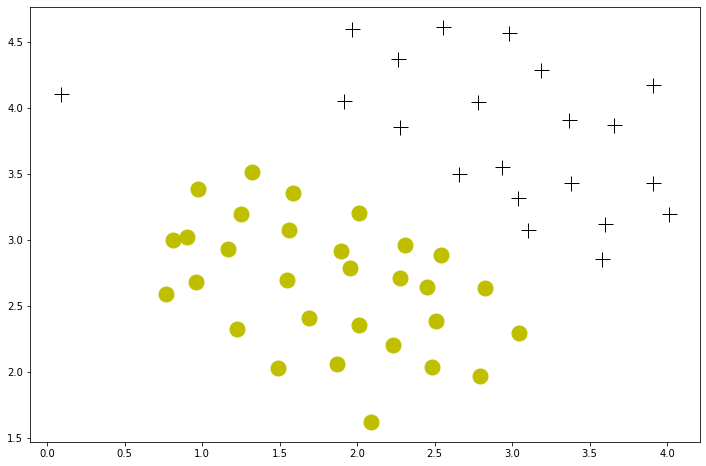

In [15]:
def plotData(X, y):
    """Plots the data points X and y into a new figure """
    
    y = y.flatten()
    class1 = y==1
    class2 = y==0
    plt.figure(figsize=(12,8))    
    plt.plot(X[:,0][class1], X[:,1][class1], "k+", markersize=15)
    plt.plot(X[:,0][class2], X[:,1][class2], "yo", markersize=15)

    # shorter but not as clear
    # plt.plot(X[:,0][pos], X[:,1][pos], 'k+', X[:,0][neg], X[:,1][neg], 'yo', markersize=15)

   

plotData(X, y)

### what is C?  Slack variable

how much misclassification is it allowed in margin boundary. Maximize the minimal margin.

Bigger the margin, 

[LibSVM]

/home/prithvi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


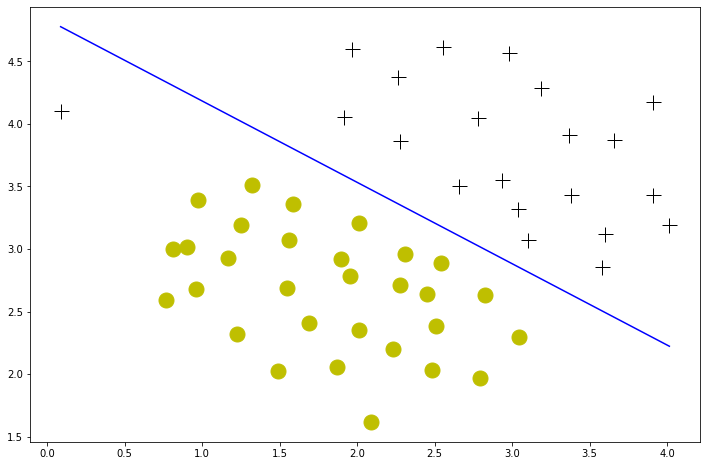

In [17]:
def svmTrainLinear(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    """Trains an SVM classifier"""    
    y = y.flatten()
    clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
    return clf.fit(X, y)       

    
def visualizeBoundaryLinear(X, y, model):
    """Plots a linear decision boundary learned by the SVM"""
    
    plotData(X, y) 
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]
    plt.plot(xp, yp, 'b-')   
    plt.show()
    



C = 1
linear_model = svmTrainLinear(X, y, C, "linear", .0001, 20)
visualizeBoundaryLinear(X, y, linear_model)

In [18]:
# Non linear classification

def visualizeBoundaryNonLinear(X, y, model):
    """Plots a non linear decision boundary learned by the SVM"""
    
    plt.figure(figsize=(10,8))
    plt.scatter(X2[class1[:,0],0],X2[class1[:,0],1],c="r",marker="+", label='class1')
    plt.scatter(X2[class2[:,0],0],X2[class2[:,0],1],c="y",marker="o", label='class2')
    X_21,X_22 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
    plt.contour(X_21,X_22,rbk_model.predict(np.array([X_21.ravel(),X_22.ravel()]).T).reshape(X_21.shape),1,colors="b")
    plt.legend()
    plt.show()
    

In [20]:
    

mat2 = scipy.io.loadmat('ex6data2.mat')
X2 = mat2["X"]
y2 = mat2["y"]
m2,n2 = X2.shape[0],X2.shape[1]
class1,class2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
m2

863

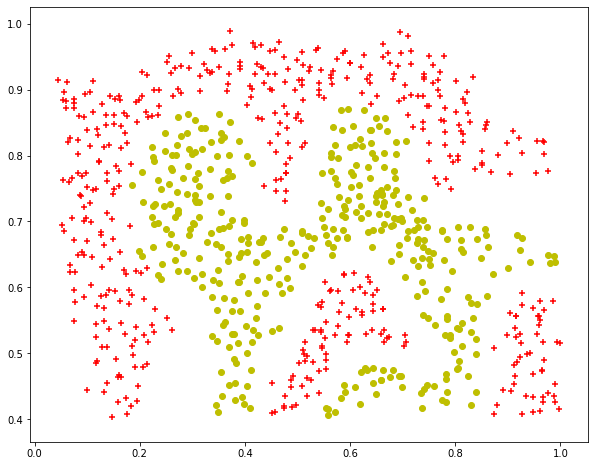

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X2[class1[:,0],0],X2[class1[:,0],1],c="r",marker="+", label='class1')
plt.scatter(X2[class2[:,0],0],X2[class2[:,0],1],c="y",marker="o", label='class2')
    

In [36]:
## gamma value is directly proportional to sensitivity towards each point.    
rbk_model = SVC(kernel="poly",gamma=50)
rbk_model.fit(X2,y2.ravel())
# plotting the decision boundary
visualizeBoundaryNonLinear(X, y, rbk_model)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 863 but corresponding boolean dimension is 211

<Figure size 720x576 with 0 Axes>

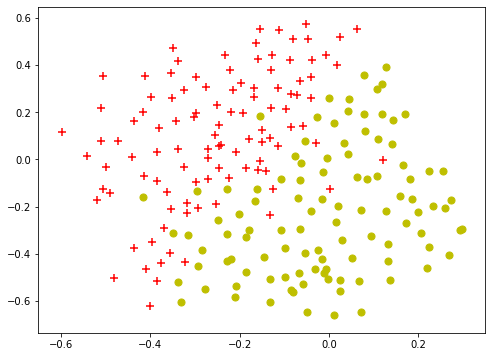

In [24]:
#Optimizing SVM parameters
mat3 = loadmat('ex6data3.mat')
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

m3,n3 = X3.shape[0],X3.shape[1]
class1,class2 = (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[class1[:,0],0],X3[class1[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[class2[:,0],0],X3[class2[:,0],1],c="y",marker="o",s=50)
plt.show()

In [28]:
def hyperParamTuning(X, y, Xval, yval,vals):
    """
    Returns your choice of C and gamma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    best_accuracy = 0
    best_c=0
    best_gamma=0        
    iterations = 1
    #different values of C
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            #default classifier rbf is used
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)            
            accuracy = classifier.score(Xval,yval)            
            if accuracy>best_accuracy:
                best_accuracy = accuracy
                best_c =C
                best_gamma=gamma
            iterations = iterations + 1
    return best_c, best_gamma, best_accuracy

In [32]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
## We start from overfitting to underfitting and somewhere in between we find


C, gamma, best_accuracy = hyperParamTuning(X3, y3.ravel(), Xval, yval.ravel(),vals)
clf_best_hyper = SVC(C=C,gamma=gamma)
clf_best_hyper.fit(X3,y3.ravel())
# best_accuracy

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

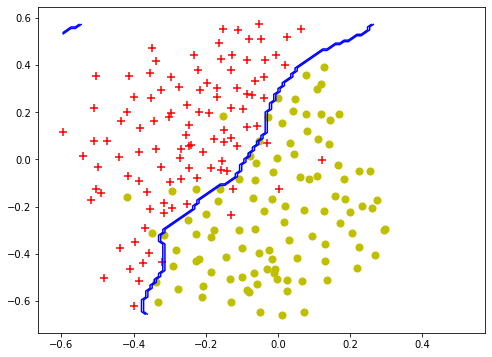

In [30]:
# plotting the decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X3[class1[:,0],0],X3[class1[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[class2[:,0],0],X3[class2[:,0],1],c="y",marker="o",s=50)
X_31,X_32 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
# convert each X31, X32 into (100,100) array into (10000,1) and concatenate to (10000,2)
# convert predicted array (10000,1) into (100,100)
plt.contour(X_31,X_32,clf_best_hyper.predict(np.array([X_31.ravel(),X_32.ravel()]).T).reshape(X_31.shape),1,colors="b")
#clf_best_hyper.predict()
plt.show()

#### Meshgrid?